In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df_train = pd.read_csv('train_v9rqX0R.csv')


In [125]:
df_train.head(2)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Handling NULL values in train data

In [127]:
# checking for null values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [128]:
df_train[df_train.isnull().any(axis=1)]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07        19.20          Regular         0.000000   
7              FDP10          NaN          Low Fat         0.127470   
8              FDH17        16.20          Regular         0.016687   
9              FDU28        19.20          Regular         0.094450   
18             DRI11          NaN          Low Fat         0.034238   
...              ...          ...              ...              ...   
8504           NCN18          NaN          Low Fat         0.124111   
8508           FDW31        11.35          Regular         0.043246   
8509           FDG45         8.10          Low Fat         0.214306   
8514           FDA01        15.00          Regular         0.054489   
8519           FDS36         8.38          Regular         0.046982   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
7               Snack Foods  107.7622            OUT027   
8              Frozen Foods   96.9726            OUT045   
9              Frozen Foods  187.8214            OUT017   
18              Hard Drinks  113.2834            OUT027   
...                     ...       ...               ...   
8504              Household  111.7544            OUT027   
8508  Fruits and Vegetables  199.4742            OUT045   
8509  Fruits and Vegetables  213.9902            OUT010   
8514                 Canned   57.5904            OUT045   
8519           Baking Goods  108.1570            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998         NaN               Tier 3   
7                          1985      Medium               Tier 3   
8                          2002         NaN               Tier 2   
9                          2007         NaN               Tier 2   
18                         1985      Medium               Tier 3   
...                         ...         ...                  ...   
8504                       1985      Medium               Tier 3   
8508                       2002         NaN               Tier 2   
8509                       1998         NaN               Tier 3   
8514                       2002         NaN               Tier 2   
8519                       2002         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
3         Grocery Store           732.3800  
7     Supermarket Type3          4022.7636  
8     Supermarket Type1          1076.5986  
9     Supermarket Type1          4710.5350  
18    Supermarket Type3          2303.6680  
...                 ...                ...  
8504  Supermarket Type3          4138.6128  
8508  Supermarket Type1          2587.9646  
8509      Grocery Store           424.7804  
8514  Supermarket Type1           468.7232  
8519  Supermarket Type1           549.2850  

[3873 rows x 12 columns]

In [129]:
## changing the outlet missing values with mode 
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode().iloc[0])

In [130]:
df_train.loc[[3]]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3           FDX07         19.2          Regular              0.0   

               Item_Type  Item_MRP Outlet_Identifier  \
3  Fruits and Vegetables   182.095            OUT010   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type    Outlet_Type  \
3                       1998      Medium               Tier 3  Grocery Store   

   Item_Outlet_Sales  
3             732.38

In [131]:
#Checking for Null Values in the dataframe
df_train[df_train.isnull().any(axis=1)]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
23             Baking Goods  107.6938            OUT019   
29                   Canned   43.6454            OUT019   
...                     ...       ...               ...   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8490  Fruits and Vegetables  162.3552            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
23                         1985       Small               Tier 1   
29                         1985       Small               Tier 1   
...                         ...         ...                  ...   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8490                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
23        Grocery Store           214.3876  
29        Grocery Store           125.8362  
...                 ...                ...  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8490      Grocery Store           487.3656  
8504  Supermarket Type3          4138.6128  

[1463 rows x 12 columns]

In [132]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [133]:
## changing the outlet missing values with mode 
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(numeric_only=True))

In [134]:
df_train.loc[[7,8488]]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10    12.857645          Low Fat         0.127470   
8488           NCN14    12.857645          Low Fat         0.091473   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7     Snack Foods  107.7622            OUT027                       1985   
8488       Others  184.6608            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
7         Medium               Tier 3  Supermarket Type3          4022.7636  
8488      Medium               Tier 3  Supermarket Type3          2756.4120

In [135]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

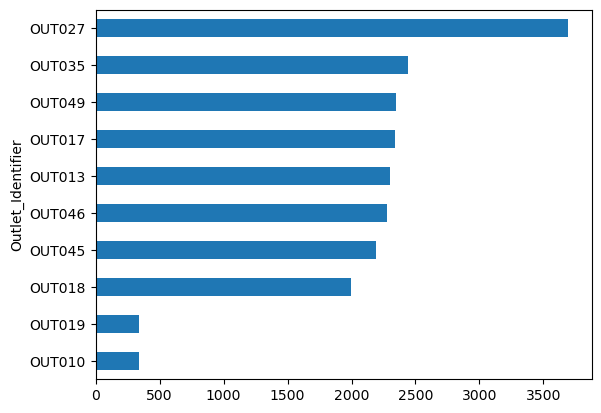

In [136]:
df_train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values().plot.barh();

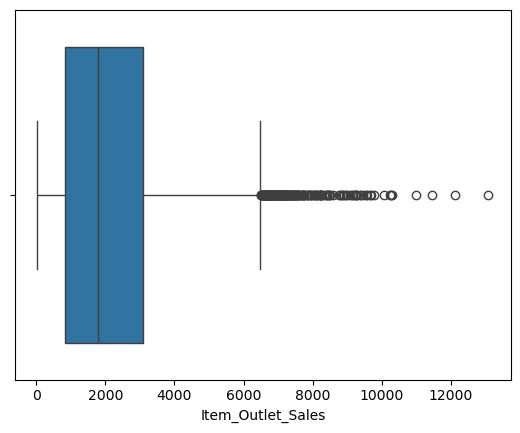

In [137]:
import seaborn as sns
sns.boxplot(x=df_train['Item_Outlet_Sales']);

In [138]:
#Identifying the outliers
# calculate the quartiles
q25, q50, q75 = np.percentile(df_train['Item_Outlet_Sales'], [25, 50, 75])

iqr = q75 - q25

# calculate the min and max
min_sales = q25 - 1.5*iqr
max_sales = q75 + 1.5*iqr

# show calculations
min_sales, q25, q50, q75, max_sales

(-2566.3261, 834.2474, 1794.331, 3101.2964, 6501.8699)

In [139]:
# Since min sales is negative we can ignore it
#finding the details for the outlets that have sales > max_sales
df_train[df_train.Item_Outlet_Sales > 6501.8699]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
43             FDC02    21.350000          Low Fat         0.069103   
130            FDY25    12.857645          Low Fat         0.033810   
132            NCR53    12.857645          Low Fat         0.144338   
145            FDP16    18.600000          Low Fat         0.039356   
203            FDI24    12.857645          Low Fat         0.078362   
...              ...          ...              ...              ...   
8245           FDU55    16.200000          Low Fat         0.035967   
8329           NCQ06    12.857645          Low Fat         0.041622   
8350           NCE18    10.000000          Low Fat         0.021421   
8447           FDS26    20.350000          Low Fat         0.089975   
8510           FDN58    13.800000          Regular         0.056862   

                  Item_Type  Item_MRP Outlet_Identifier  \
43                   Canned  259.9278            OUT018   
130                  Canned  180.5976            OUT027   
132      Health and Hygiene  224.4404            OUT027   
145            Frozen Foods  246.3802            OUT049   
203            Baking Goods  177.9370            OUT027   
...                     ...       ...               ...   
8245  Fruits and Vegetables  260.3278            OUT049   
8329              Household  253.6014            OUT027   
8350              Household  248.3750            OUT035   
8447                  Dairy  261.6594            OUT017   
8510            Snack Foods  231.5984            OUT035   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
43                         2009      Medium               Tier 3   
130                        1985      Medium               Tier 3   
132                        1985      Medium               Tier 3   
145                        1999      Medium               Tier 1   
203                        1985      Medium               Tier 3   
...                         ...         ...                  ...   
8245                       1999      Medium               Tier 1   
8329                       1985      Medium               Tier 3   
8350                       2004       Small               Tier 2   
8447                       2007      Medium               Tier 2   
8510                       2004       Small               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
43    Supermarket Type2          6768.5228  
130   Supermarket Type3          7968.2944  
132   Supermarket Type3          6976.2524  
145   Supermarket Type1          7370.4060  
203   Supermarket Type3          6704.6060  
...                 ...                ...  
8245  Supermarket Type1          7549.5062  
8329  Supermarket Type3          6630.0364  
8350  Supermarket Type1          7240.5750  
8447  Supermarket Type1          7588.1226  
8510  Supermarket Type1          7182.6504  

[186 rows x 12 columns]

In [140]:
df_train[df_train.Item_Outlet_Sales > 6600].count()

Item_Identifier              176
Item_Weight                  176
Item_Fat_Content             176
Item_Visibility              176
Item_Type                    176
Item_MRP                     176
Outlet_Identifier            176
Outlet_Establishment_Year    176
Outlet_Size                  176
Outlet_Location_Type         176
Outlet_Type                  176
Item_Outlet_Sales            176
dtype: int64

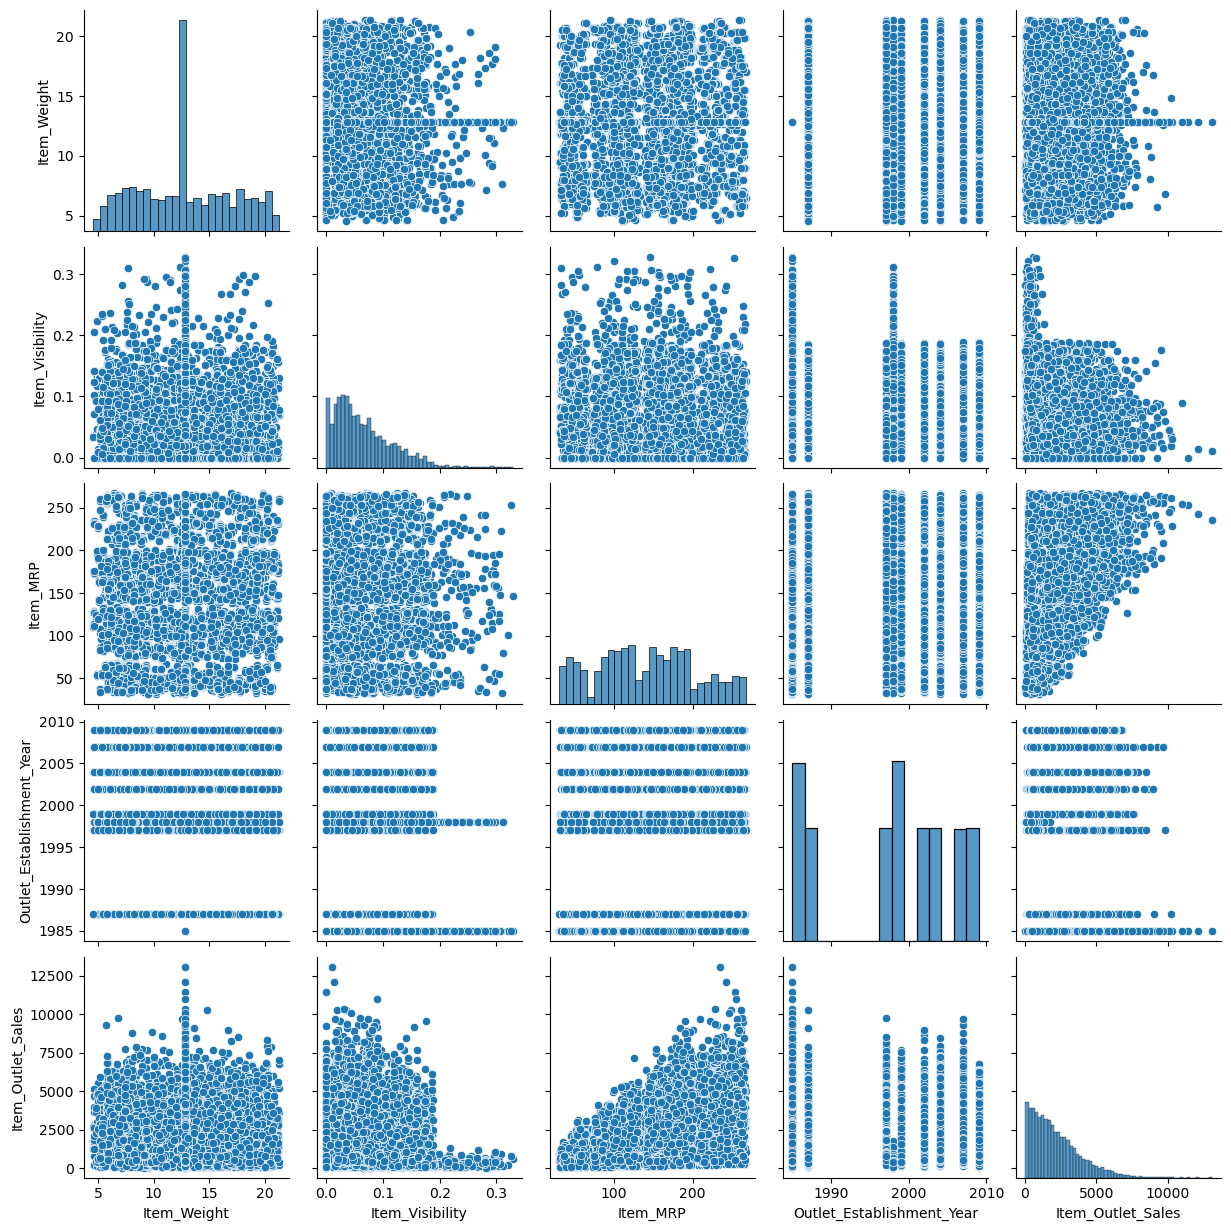

In [141]:
sns.pairplot(df_train)

In [142]:
import datetime as dt
current_year = dt.datetime.today().year
df_train['Outlet_age']= current_year - df_train['Outlet_Establishment_Year']

In [143]:
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_age  
0  Supermarket Type1          3735.1380          26  
1  Supermarket Type2           443.4228          16  
2  Supermarket Type1          2097.2700          26  
3      Grocery Store           732.3800          27  
4  Supermarket Type1           994.7052          38

In [144]:
df_train = df_train.drop('Outlet_Establishment_Year',axis=1)

In [145]:
df_train.corr(numeric_only=True)

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
Item_Weight           1.000000        -0.012049  0.024756           0.011550   
Item_Visibility      -0.012049         1.000000 -0.001315          -0.128625   
Item_MRP              0.024756        -0.001315  1.000000           0.567574   
Item_Outlet_Sales     0.011550        -0.128625  0.567574           1.000000   
Outlet_age            0.008301         0.074834 -0.005020           0.049135   

                   Outlet_age  
Item_Weight          0.008301  
Item_Visibility      0.074834  
Item_MRP            -0.005020  
Item_Outlet_Sales    0.049135  
Outlet_age           1.000000

### Since Item_Weight has very Week Correlation and has little to know impact we are dropping the column

In [146]:
df_train = df_train.drop('Item_Weight', axis=1)

## Checking for typos in columns - Train dataset

In [147]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [148]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].str.replace('LF','Low Fat', case=False)
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].str.replace('low fat','Low Fat', case=False)
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].str.replace('reg','Regular', case=False)
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].str.replace('Regularular','Regular', case=False)

In [149]:
df_train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [150]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [151]:
df_train['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [152]:
df_train['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

### Checking Whether there is any effect of outlet location on sales

In [153]:
from scipy.stats import kruskal
# Creating separate groups based on Outlet_Location_Type
group_1 = df_train[df_train['Outlet_Location_Type'] == 'Tier 1']['Item_Outlet_Sales']
group_2 = df_train[df_train['Outlet_Location_Type'] == 'Tier 2']['Item_Outlet_Sales']
group_3 = df_train[df_train['Outlet_Location_Type'] == 'Tier 3']['Item_Outlet_Sales']
stat, p_value = kruskal(group_1, group_2, group_3)

print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in sales across different Outlet Location Types.")
else:
    print("No significant difference in sales across Outlet Location Types.")

Kruskal-Wallis Statistic: 155.5056807736284
P-value: 1.7075383551846012e-34
There is a significant difference in sales across different Outlet Location Types.


##### since P_value is greater than 0.05 there is no significantt relationship between location and sales hence we can drop the column

In [154]:
df_train = df_train.drop('Outlet_Location_Type', axis=1)
df_train.head()

Item_Identifier Item_Fat_Content  Item_Visibility              Item_Type  \
0           FDA15          Low Fat         0.016047                  Dairy   
1           DRC01          Regular         0.019278            Soft Drinks   
2           FDN15          Low Fat         0.016760                   Meat   
3           FDX07          Regular         0.000000  Fruits and Vegetables   
4           NCD19          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier Outlet_Size        Outlet_Type  \
0  249.8092            OUT049      Medium  Supermarket Type1   
1   48.2692            OUT018      Medium  Supermarket Type2   
2  141.6180            OUT049      Medium  Supermarket Type1   
3  182.0950            OUT010      Medium      Grocery Store   
4   53.8614            OUT013        High  Supermarket Type1   

   Item_Outlet_Sales  Outlet_age  
0          3735.1380          26  
1           443.4228          16  
2          2097.2700          26  
3           732.3800          27  
4           994.7052          38

### Checking Whether there is any effect of Item_Fat_Content on sales

In [155]:
group_low_fat = df_train[df_train['Item_Fat_Content'] == 'Low Fat']['Item_Outlet_Sales']
group_reg = df_train[df_train['Item_Fat_Content'] == 'Regular']['Item_Outlet_Sales']

# Perform Kruskal-Wallis Test
stat, p_value = kruskal(group_low_fat, group_reg)

print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant relationship between Item_Fat_Content and Sales.")
else:
    print("No significant relationship between Item_Fat_Content and Sales.")

Kruskal-Wallis Statistic: 3.0077207310075837
P-value: 0.08286874092719329
No significant relationship between Item_Fat_Content and Sales.


#### since p_value is greater than 0.05 , we can say there is no significant effect of Item Fat Content On Sales hence we can remove the column

In [156]:
df_train = df_train.drop('Item_Fat_Content', axis=1)

### Checking Whether there is any effect of Item Type on sales

In [157]:
from scipy.stats import kruskal

# Group sales data by Item_Type
groups = [df_train[df_train['Item_Type'] == item]['Item_Outlet_Sales'] for item in df_train['Item_Type'].unique()]

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*groups)

# Print results
print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant relationship between Item Type and Sales.")
else:
    print("No significant relationship between Item Type and Sales.")

Kruskal-Wallis Test Statistic: 41.20045965116603
P-value: 0.00029804400997627455
There is a statistically significant relationship between Item Type and Sales.


### Checking Whether there is any effect of outlet Type on sales

In [158]:
groups = [df_train[df_train['Outlet_Type'] == outlet]['Item_Outlet_Sales'] for outlet in df_train['Outlet_Type'].unique()]

# Perform Kruskal-Wallis Test
stat, p_value = kruskal(*groups)

# Print result
print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant relationship found between Outlet_Type and Sales.")
else:
    print("No significant relationship between Outlet_Type and Sales.")

Kruskal-Wallis Test Statistic: 2803.360888346635
P-value: 0.0
Significant relationship found between Outlet_Type and Sales.


### Checking Whether there is any effect of 'Outlet_Size on sales

In [159]:
groups = [df_train[df_train['Outlet_Size'] == size]['Item_Outlet_Sales'] for size in df_train['Outlet_Size'].dropna().unique()]

# Perform Kruskal-Wallis Test
stat, p_value = kruskal(*groups)

# Print result
print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant relationship found between Outlet_Size and Sales.")
else:
    print("No significant relationship between Outlet_Size and Sales.")

Kruskal-Wallis Test Statistic: 100.4644254686942
P-value: 1.5290693945898476e-22
Significant relationship found between Outlet_Size and Sales.


#### Since the  p-value is 1.54 × 10⁻²², which much smaller than 0.05,that means  sales vary significantly based on the size of the outlet.

## Checking Whether there is any effect of Outlet_Identifier on sales

In [160]:
# Group sales by Outlet_Identifier
groups = [df_train[df_train['Outlet_Identifier'] == outlet]['Item_Outlet_Sales'] for outlet in df_train['Outlet_Identifier'].unique()]

# Perform Kruskal-Wallis Test
stat, p_value = kruskal(*groups)

# Print result
print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant relationship found between Outlet_Identifier and Sales.")
else:
    print("No significant relationship between Outlet_Identifier and Sales.")

Kruskal-Wallis Test Statistic: 2814.4589394129075
P-value: 0.0
Significant relationship found between Outlet_Identifier and Sales.


In [161]:
df_train.columns

Index(['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_age'],
      dtype='object')

### Implementing One-Hot-Encoding For Train Data

In [162]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False) # drop=first to avoid dummy variables
encoded_cols = encoder.fit_transform(df_train[['Item_Identifier', 'Item_Type',
                                               'Outlet_Identifier', 'Outlet_Size',
                                               'Outlet_Type']])
# converting to data frame
df_train_encoded = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out())

# concatenate with numerical columns
df_train_final = pd.concat([df_train.drop(columns=['Item_Identifier', 'Item_Type',
                                               'Outlet_Identifier', 'Outlet_Size',
                                               'Outlet_Type']),
                            df_train_encoded], axis=1)

In [163]:
df_train_final.head()

Item_Visibility  Item_MRP  Item_Outlet_Sales  Outlet_age  \
0         0.016047  249.8092          3735.1380          26   
1         0.019278   48.2692           443.4228          16   
2         0.016760  141.6180          2097.2700          26   
3         0.000000  182.0950           732.3800          27   
4         0.000000   53.8614           994.7052          38   

   Item_Identifier_DRA24  Item_Identifier_DRA59  Item_Identifier_DRB01  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Item_Identifier_DRB13  Item_Identifier_DRB24  Item_Identifier_DRB25  ...  \
0                    0.0                    0.0                    0.0  ...   
1                    0.0                    0.0                    0.0  ...   
2                    0.0                    0.0                    0.0  ...   
3                    0.0                    0.0                    0.0  ...   
4                    0.0                    0.0                    0.0  ...   

   Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   Outlet_Identifier_OUT049  Outlet_Size_Medium  Outlet_Size_Small  \
0                       1.0                 1.0                0.0   
1                       0.0                 1.0                0.0   
2                       1.0                 1.0                0.0   
3                       0.0                 1.0                0.0   
4                       0.0                 0.0                0.0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                            1.0                            0.0   
1                            0.0                            1.0   
2                            1.0                            0.0   
3                            0.0                            0.0   
4                            1.0                            0.0   

   Outlet_Type_Supermarket Type3  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  

[5 rows x 1591 columns]

In [164]:
from sklearn.model_selection import train_test_split

# Define target variable
target = 'Item_Outlet_Sales'

# Split into features (X) and target (y)
X = df_train_final.drop(columns=[target])  
y = df_train_final[target]

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
import joblib
from sklearn.preprocessing import OneHotEncoder

# Assuming encoder was fitted on categorical columns during training
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoder.fit(df_train[categorical_cols])  # Fit on training categorical data

# Save it
joblib.dump(encoder, "encoder.pkl")
print("Encoder saved successfully!")

Encoder saved successfully!


# Implementing Linear regression

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MAE: {mae_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R2 Score: {r2_lr}")

Linear Regression:
MAE: 26764725244342.953
RMSE: 777188935590357.2
R2 Score: -2.2223299992260343e+23


# Desion Tree

In [167]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree:")
print(f"MAE: {mae_dt}")
print(f"RMSE: {rmse_dt}")
print(f"R2 Score: {r2_dt}")

Decision Tree:
MAE: 997.3340361290321
RMSE: 1447.0698939579797
R2 Score: 0.22956793979481005


# random Forest

In [168]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R2 Score: {r2_rf}")

Random Forest:
MAE: 755.0432970170089
RMSE: 1084.1477700028875
R2 Score: 0.5675535938976253


# XGBoost 

In [169]:
from xgboost import XGBRegressor

# Train the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost:")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R2 Score: {r2_xgb}")


XGBoost:
MAE: 748.7056724657846
RMSE: 1081.1979377995083
R2 Score: 0.5699036589622768


# Random Forest Cross Validation

In [170]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Random Forest - Cross Validation MAE:", np.abs(cv_scores_rf).mean())
print("Random Forest - Cross Validation RMSE:", np.sqrt(np.abs(cv_scores_rf)).mean())

Random Forest - Cross Validation MAE: 804.1202293611613
Random Forest - Cross Validation RMSE: 28.356506610470035


## XGBoost Cross validation

In [171]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')

print("XGBoost - Cross Validation MAE:", np.abs(cv_scores_xgb).mean())
print("XGBoost - Cross Validation RMSE:", np.sqrt(np.abs(cv_scores_xgb)).mean())

XGBoost - Cross Validation MAE: 798.9377280993579
XGBoost - Cross Validation RMSE: 28.264712293249822


# Hyperparameter Tuning Of XGBoost

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='neg_mean_absolute_error',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

# Train final model with best parameters
best_xgb_model = XGBRegressor(**random_search.best_params_, objective='reg:squarederror', random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
MAE: 720.4728337550064
RMSE: 1029.6613757210098
R2 Score: 0.6099285412766143


# Second Time fine tuning the model

In [173]:
from sklearn.model_selection import RandomizedSearchCV

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_dist, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    n_iter=20,  # Number of random combinations to try
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [174]:
import joblib
import xgboost as xgb

# Assuming 'xgb_model' is your trained XGBoost model
joblib.dump(xgb_model, "xgboost_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [175]:

# Save the training columns
joblib.dump(df_train_final.columns, "train_columns.pkl")
print("train_columns.pkl saved successfully!")

train_columns.pkl saved successfully!


In [205]:
df_train_final.columns

Index(['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_age',
       'Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', 'Item_Identifier_DRB13',
       'Item_Identifier_DRB24', 'Item_Identifier_DRB25',
       ...
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1591)

# Preparing The Test Data